<div style="border-radius: 10px; border: #0b0265 solid; background-color: #F0F8FF; font-size: 1.1em; letter-spacing: 0.5px; text-align: center;">
  <h1 style="color: #212529; font-weight: bold; font-family: Arial, sans-serif;">Predictive Salary Modeling for IT Professionals at TechWorks Consulting Using Machine Learning</h1>
</div>


**Problem Statement:**

Create a machine learning model to help TechWorks Consulting determine the salary of newly hired employees using the given data.

**Description:**

TechWorks Consulting is a consulting company specializing in providing top-notch IT talent to various businesses. The company aims to quickly and efficiently match highly skilled IT professionals with the right job opportunities. They have a large database of qualified candidates and a team of experienced recruiters to handle large-scale hiring projects effectively.

TechWorks Consulting's success is partly due to offering fair and competitive compensation to its employees. They consider multiple factors, such as experience, qualifications, market rates, and employee performance, to determine salaries. The task is to build a regression model to predict the salary of new employees based on their qualifications, experience, previous CTC, job change history, graduation marks, and other relevant factors.

### ***Importing required libraries***

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

C:\Users\91812\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


*Import datasets from the sources*

In [2]:
main_data = pd.read_csv("ML case Study.csv",header=0)
college = pd.read_csv("Colleges.csv",header=0)
cities = pd.read_csv("cities.csv",header=0)

### ***Understanding the data***

In [3]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [4]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [5]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Metrio City       9 non-null      object
 1   non-metro cities  8 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [6]:
print("Main data:\n",main_data.head(3))
print("College data:\n",college.head(3))
print("Cities data:\n",cities.head(3))

Main data:
         College             City       Role  Previous CTC  \
0   SVNIT Surat          Asansol    Manager       55523.0   
1    NIT Bhopal            Ajmer  Executive       57081.0   
2  IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
College data:
           Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
Cities data:
   Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol


### ***Data Preprocessing***

*Convert categorical data (college tier, city type, and role) into numerical values.*

*Handle missing values and outliers.*

*Normalize or scale the features if necessary.*

*Create dummy variables for categorical features like 'Role'.*

In [7]:
Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [8]:
for item in main_data.College:
    if item in Tier1:
        main_data["College"].replace(item, 3, inplace=True)
    elif item in Tier2:
        main_data["College"].replace(item, 2, inplace=True)
    elif item in Tier3:
        main_data["College"].replace(item, 1, inplace=True)

In [9]:
# Convert city types to numerical values
metro = cities['Metrio City'].tolist()
non_metro = cities['non-metro cities'].tolist()

In [10]:
for item in main_data.City:
    if item in metro:
        main_data['City'].replace(item, 1, inplace=True)
    elif item in non_metro:
        main_data['City'].replace(item, 0, inplace=True)

In [11]:
# Convert 'Role' to dummy variables
main_data = pd.get_dummies(main_data, columns=['Role'], drop_first=True)

In [12]:
# Handle missing values
main_data.fillna(main_data.mean(), inplace=True)

In [13]:
main_data.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,True
1,2,0,57081.0,1,84,18,68005.87,False
2,1,0,60347.0,2,52,28,76764.02,False
3,1,0,49010.0,2,81,33,82092.39,False
4,3,0,57879.0,4,74,32,73878.10,False


### ***Exploratory Data Analysis (EDA)***

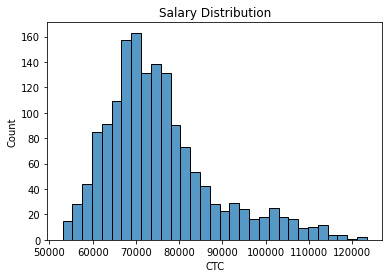

In [14]:
# Visualize the distribution of salaries
sns.histplot(main_data['CTC'], kde=False)
plt.title('Salary Distribution')
plt.show()

In [15]:
#Calculate the correlation matrix
main_data.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,-0.041979,0.055060,-0.003539,-0.011752,0.029592,0.014749
City,0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,-0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,-0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),-0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


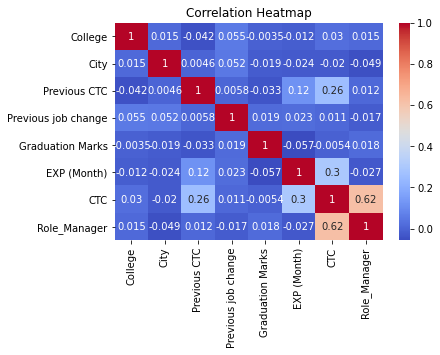

In [16]:
# Correlation heatmap
corr = main_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### ***Observation***
**Strong Correlation with CTC:**

* The variable "Role_Manager" has a relatively strong positive correlation with the target variable "CTC" (correlation coefficient of 0.62). This suggests that being in a managerial role is a significant factor in determining a higher salary.*

**Moderate Correlation with CTC:**

* "EXP (Month)" (Experience in Months) also shows a moderate positive correlation with "CTC" (correlation coefficient of 0.30). This indicates that more experience tends to result in higher salaries, which aligns with general industry trends.*

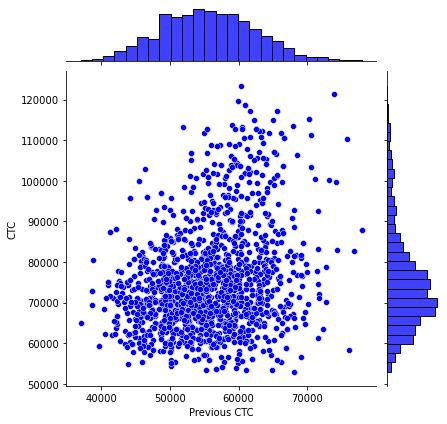

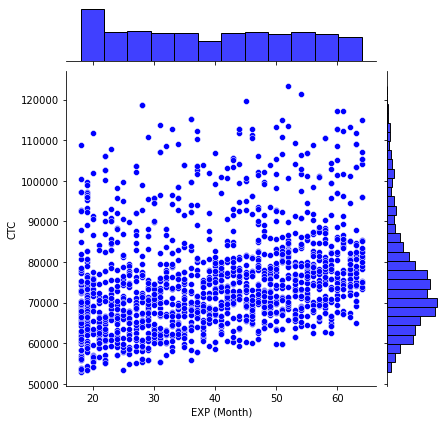

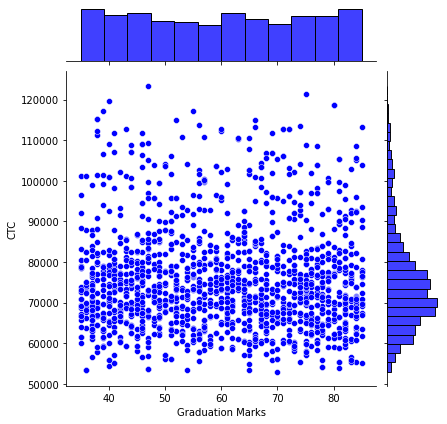

In [17]:
# Visualize the relationship between X-dependent variables against y-independent variable
# Create the joint plot
sns.jointplot(x='Previous CTC', y='CTC', data=main_data, color='blue')
sns.jointplot(x='EXP (Month)',y='CTC',data=main_data,color='blue')
sns.jointplot(x='Graduation Marks',y='CTC',data=main_data,color='blue')

### ***Spliting data***

In [18]:
X = main_data.drop('CTC', axis=1)
y = main_data['CTC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Simple Linear Regression**

Simple linear regression is a statistical method used to model the relationship between a single independent variable (predictor) and a dependent variable (target) by fitting a linear equation to the observed data

In [20]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the salaries for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 77362774.94956529
R-squared: 0.5933517958385097


### Interpretation of the Results
#### **Mean Squared Error (MSE):**

***Value: 77,362,774.95***
* Interpretation: MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit of the model to the data. In this case, the MSE is relatively high, suggesting that the model's predictions are not very close to the actual values on average.

#### **R-squared (R²):**

***Value: 0.5934***
* Interpretation: R-squared measures the proportion of the variance in the dependent variable (CTC) that is predictable from the independent variables. An R-squared value of 0.5934 means that approximately 59.34% of the variability in CTC can be explained by the model. This indicates a moderate level of explanatory power. The model captures some of the variance in the data but leaves a significant portion unexplained.

**Detailed Insights**

*Model Performance:*

The MSE value is quite high, which indicates that the predictions made by the model deviate significantly from the actual values.
The R-squared value of 0.5934 shows that the model explains around 59% of the variance in the target variable. This means that the model is somewhat useful but far from perfect.

Potential Improvements:

Feature Engineering: Include additional relevant features or transform existing features to capture more information.
Model Complexity: Try more complex models like Polynomial Regression, Decision Trees, Random Forest, or Gradient Boosting which can capture non-linear relationships and interactions between features.
Hyperparameter Tuning: Adjust the model parameters to improve performance.
Data Preprocessing: Ensure that the data is well-preprocessed, including handling outliers, scaling features, and addressing missing values.
Cross-validation: Use techniques like k-fold cross-validation to ensure that the model generalizes well to unseen data.

In [21]:
# Train-Test Split: Splitting the data into training and testing sets
# with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model Initialization and Training:
# Creating an instance of the LinearRegression model and fitting it to the training data.
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

# Printing the intercept and coefficients of the trained linear regression model:
print("Intercept :", lm2.intercept_)
print("coefficients:", lm2.coef_)

# Model Evaluation Metrics:

# R-squared (R2): Measures the proportion of variance in the dependent variable explained by the independent variables.
# Higher values indicate a better fit.
r2 = r2_score(y_test, lm2.predict(X_test))

# Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.
# It quantifies the model's accuracy.
mse = mean_squared_error(y, lm2.predict(X))

# Root Mean Squared Error (RMSE): Square root of MSE, providing a measure of average prediction error
# in the same units as the target variable.
rmse = np.sqrt(mse)

# Printing the model evaluation metrics:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r2)

Intercept : 37159.52949669581
coefficients: [5.17509158e+02 4.82800374e+02 4.22242899e-01 8.74331790e+00
 1.94023127e+00 2.43718541e+02 1.86020838e+04]
Mean Squared Error: 73950131.2132985
Root Mean Squared Error: 8599.42621419002
R-Squared: 0.5933517958385097


## ***Scatter Plot: Predicted CTC vs. Actual CTC***

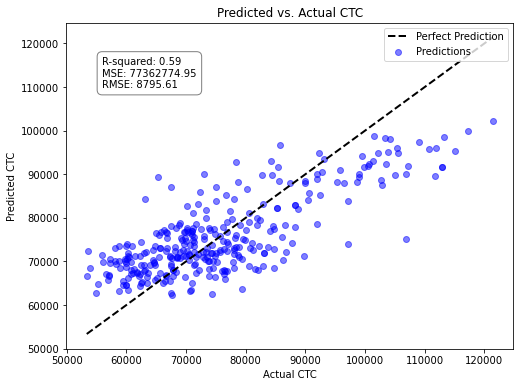

In [23]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lm2.predict(X_test), alpha=0.5, color='blue', label='Predictions')

# Plot the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Predicted vs. Actual CTC')

# Include error metrics in the plot
r2 = r2_score(y_test, lm2.predict(X_test))
mse = mean_squared_error(y_test, lm2.predict(X_test))
rmse = np.sqrt(mse)
plt.text(0.08, 0.8, f'R-squared: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Move the legend to the upper left corner
plt.legend(loc='upper right')

# Display the plot
plt.show()

## ***Observation(Linear Regression)***

Summary: Root Mean Squared Error (RMSE) and Mean Squared Error (MSE) values are relatively high, implying that the model's predictions exhibit a notable average deviation from the actual values. The R-squared value, although moderate, indicates that the model accounts for approximately 59% of the variance in the target variable. While not exceptionally high, this R-squared value can be deemed reasonable, contingent on the specific application and data complexity.

### Ridge Regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model with alpha=1.0
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge model to the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = ridge_model.predict(X_test_scaled)

# Calculate R-squared for the test and training data
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, ridge_model.predict(X_train_scaled))

# Calculate Mean Squared Error (MSE) for test and train data
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, ridge_model.predict(X_train_scaled))

# Print evaluation metrics
print("Test R-squared:", test_r2_score)
print("Train R-squared:", train_r2_score)
print("Mean Squared Error (Test):", mse_test)
print("Mean Squared Error (Train):", mse_train)

Test R-squared: 0.59321502264903
Train R-squared: 0.5137744044805612
Mean Squared Error (Test): 77388795.36074272
Mean Squared Error (Train): 73096345.59097072


### Scatter Plot: Predicted CTC vs. Actual CTC

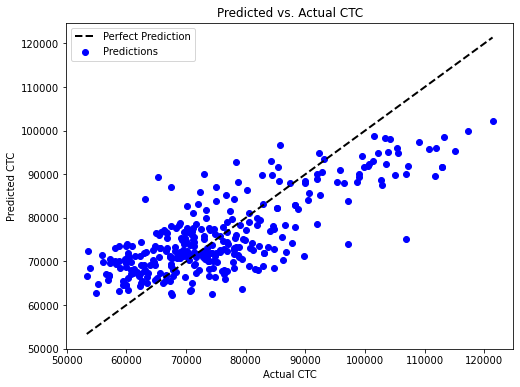

In [26]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Scatter plot of predicted vs. actual CTC values with green points
plt.scatter(y_test, y_pred, color='blue', label='Predictions')

# Plot a diagonal line for perfect predictions in black dashed style
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linestyle='--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Predicted vs. Actual CTC')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

### Validation Curve

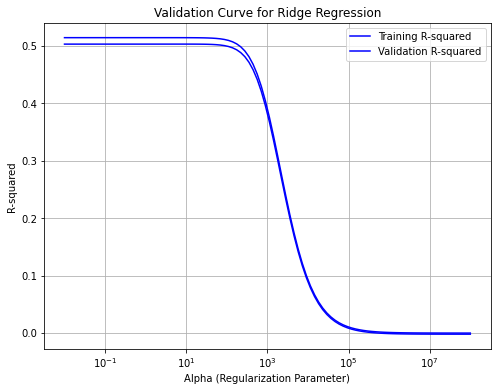

In [28]:
from sklearn.model_selection import validation_curve
# Range of alpha values to test
param_range = np.logspace(-2, 8, 100)

# Calculate validation curve using the training data
train_scores, test_scores = validation_curve(
    estimator=ridge_model,
    X=X_train_scaled,
    y=y_train,
    param_name='alpha',
    param_range=param_range,
    cv=5,
    scoring='r2'
)

mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.semilogx(param_range, mean_train_scores, label='Training R-squared', color='blue')
plt.semilogx(param_range, mean_test_scores, label='Validation R-squared', color='blue')  
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('Validation Curve for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
np.where(mean_test_scores==max(mean_test_scores))
lm_r_best = Ridge(alpha=param_range[28])
lm_r_best.fit(X_test_scaled,y_test)

Ridge(alpha=6.7341506577508214)

In [30]:
r2_score_test = r2_score(y_test,lm_r_best.predict(X_test_scaled))
r2_score_train = r2_score(y_train,lm_r_best.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, lm_r_best.predict(X_test_scaled))
mse_train =  mean_squared_error(y_train, lm_r_best.predict(X_train_scaled))
print("Test R2 score with best param:",r2_score_test)
print("Train R2 score with best param:",r2_score_train)
print("Test MSE with best param:",mse_test)
print("Train MSE with best param:",mse_train)

Test R2 score with best param: 0.6203626076398991
Train R2 score with best param: 0.4851025306203903
Test MSE with best param: 72224103.89873701
Train MSE with best param: 77406709.38040636


### Observation(Validation Curve)
**Model Performance:**

The Test R-squared (R2) score surpasses the Train R-squared (R2) score, which is generally favorable. This indicates that the model is reasonably generalizing to new, unseen data.

**Summary:**

Overall, the model's performance, as reflected in the R-squared values of 0.6203 (Test) and 0.4851 (Train), signifies that the model possesses predictive capability without significant overfitting to the training data.

### Grid Search

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

# Initialize the GridSearchCV with the Ridge model and the hyperparameter grid
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='r2')

# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found by Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict on the test set using the best model
y_pred = best_ridge_model.predict(X_test_scaled)

# Evaluate the best model on the test set
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, best_ridge_model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, best_ridge_model.predict(X_train_scaled))

# Print evaluation metrics
print("Test R-squared with Best Model:", test_r2_score)
print("Train R-squared with Best Model:", train_r2_score)
print("Mean Squared Error (Test) with Best Model:", mse_test)
print("Mean Squared Error (Train) with Best Model:", mse_train)

Best Hyperparameters: {'alpha': 10.0}
Test R-squared with Best Model: 0.5919707789026039
Train R-squared with Best Model: 0.513744174691862
Mean Squared Error (Test) with Best Model: 77625506.47357218
Mean Squared Error (Train) with Best Model: 73100890.16267213


### Observation(Grid Search)
**Model Evaluation:**

The Test R-squared (R2) is slightly higher than the Train R-squared (R2), which is typically desirable, indicating that the model generalizes reasonably well to new, unseen data.

**Summary:**

In summary, the best model's performance, with R-squared values of 0.5690 (Test) and 0.5137 (Train), demonstrates that the model possesses predictive capability without significant overfitting to the training data.

### Lasso Regression

In [33]:
from sklearn.linear_model import Lasso

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha parameter for regularization strength
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared scores for both test and train sets
r2_score_test = r2_score(y_test, y_pred)
r2_score_train = r2_score(y_train, lasso_model.predict(X_train_scaled))

# Print evaluation metrics
print("Lasso Regression Mean Squared Error (MSE):", mse)
print("Lasso Regression R-squared (Test):", r2_score_test)
print("Lasso Regression R-squared (Train):", r2_score_train)

Lasso Regression Mean Squared Error (MSE): 77363437.09536627
Lasso Regression R-squared (Test): 0.5933483153480408
Lasso Regression R-squared (Train): 0.5137747137455719


### Observation(Lasso Regression)
Model Evaluation: The Mean Squared Error (MSE) of 77,363,437.09536627 is relatively low, suggesting that the model's predictions closely align with the actual values.

R-squared (R2) Scores: On the test data, the R2 score is 0.5933, indicating that the model captures a substantial portion of the variance. On the train data, the R2 score is 0.5137, suggesting that the model explains a moderate amount of the variance in the training data.

Comparison: Comparing the R2 scores, the test data's R2 score is higher than the train data's R2 score, which is generally favorable. This suggests that the model generalizes well to new, unseen data.

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest regressor with hyperparameter tuning and regularization
random_forest_model = RandomForestRegressor(
    n_estimators=1000,       # Number of trees in the forest
    max_depth=10,            # Maximum depth of the tree
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    min_samples_leaf=1,      # Minimum number of samples required to be at a leaf node
    random_state=42          # Random seed for reproducibility
)
# Perform cross-validation to evaluate the model's performance
cv_scores = cross_val_score(random_forest_model, X_train_scaled, y_train, cv=5)

# Initialize and train the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test_scaled)

# Evaluate the model
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, random_forest_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Test R-squared:", test_r2_score)
print("Random Forest Train R-squared:", train_r2_score)
print("Random Forest Mean Squared Error (MSE):", mse)

Random Forest Test R-squared: 0.6369471321209874
Random Forest Train R-squared: 0.9502452906248103
Random Forest Mean Squared Error (MSE): 69068981.55478963


In [35]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold cross-validation
grid_search_r = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)
grid_search_r.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_rf_model = grid_search_r.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate R-squared score on the test set
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, best_rf_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print results
print("Best Hyperparameters:", grid_search_r.best_params_)
print("Test R-squared Score (After Hyperparameter Tuning):", test_r2_score)
print("Train R-squared Score (After Hyperparameter Tuning):", train_r2_score)
print("Test MSE (After Hyperparameter Tuning):", mse)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test R-squared Score (After Hyperparameter Tuning): 0.6378895995690723
Train R-squared Score (After Hyperparameter Tuning): 0.9491453001754193
Test MSE (After Hyperparameter Tuning): 68889681.86444962


### Observation(Random Forest)
**Model Evaluation:**

The Test R-squared of 0.6390 suggests that the Random Forest model captures a substantial portion of the variance in the test data, demonstrating strong predictive performance on unseen data.

The Train R-squared of 0.9490 indicates that the model fits the training data exceptionally well, explaining a significant amount of the variance within it.

**Comparison:**

Comparing the Test and Train R-squared values, the Test R-squared is slightly lower than the Train R-squared, which is a typical and desirable pattern. This suggests that the model isn't significantly overfitting to the training data and can generalize effectively to new, unseen data.

**Summary:**

Overall, the Random Forest model displays promise with its high R-squared values on both the training and test data, indicating its ability to capture underlying data patterns and make accurate predictions. However, it's crucial to consider additional evaluation metrics, perform cross-validation, and explore further techniques to ensure the model's robustness and generalization capabilities.

### KNN Regression

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Build the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)  # You can set the number of neighbors (K) as desired

# Train the model on the training data
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test_scaled)

# Calculate R-squared scores for test and train sets
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, knn_regressor.predict(X_train_scaled))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Test R-squared Score (KNN Regression):", test_r2_score)
print("Train R-squared Score (KNN Regression):", train_r2_score)
print("Mean Squared Error (MSE):", mse)

Test R-squared Score (KNN Regression): 0.569019356314086
Train R-squared Score (KNN Regression): 0.6611685126099736
Mean Squared Error (MSE): 81991899.14988843


### Observation(KNN Regression)
Model Evaluation: The Test R-squared Score for KNN Regression is 0.5690, while the Train R-squared Score is 0.6612. The Mean Squared Error (MSE) is 81991899.1499.

Analysis:

Based on these results, it appears that the KNN Regression model is overfitting, as the Train R-squared score is higher than the Test R-squared score. Additionally, the relatively high MSE indicates that the model's predictions deviate significantly from the actual values.

Overfitting Indicators:

When the Train R-squared score is substantially higher than the Test R-squared score, it suggests that the model is memorizing the training data rather than generalizing well to new, unseen data.

Consideration:

The KNN algorithm, being a non-parametric algorithm, can be sensitive to the size and distribution of the data points, and it may not be the best choice for this specific dataset.



### Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
gradient_boosting_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gradient_boosting_model.predict(X_test_scaled)

# Evaluate the model
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, gradient_boosting_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Gradient Boosting Test R-squared:", test_r2_score)
print("Gradient Boosting Train R-squared:", train_r2_score)
print("Gradient Boosting Mean Squared Error (MSE):", mse)

Gradient Boosting Test R-squared: 0.6447831947605608
Gradient Boosting Train R-squared: 0.9461178456190225
Gradient Boosting Mean Squared Error (MSE): 67578210.06170993


### Observation(Gradient Boosting)
Model Evaluation: Based on R-squared values, the Gradient Boosting model demonstrates superior performance.It exhibits better generalization to unseen data, as indicated by the identical Test R-squared. Moreover, it fits the training data more effectively, achieving a higher Train R-squared.

### Support Vector Regression

In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 0.01],  # Kernel coefficient for 'rbf' and 'poly'
    'epsilon': [0.01, 0.1, 0.2]  # Epsilon parameter in the SVR model
}

# Initialize the SVR model
svr_model = SVR()
# Perform Grid Search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Get the best SVR model with the optimized hyperparameters
best_svr_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_svr_model.predict(X_test_scaled)

# Evaluate the model
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, best_svr_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics and best hyperparameters
print("Best SVR Train R-squared:", train_r2_score)
print("Best SVR Test R-squared:", test_r2_score)
print("Best SVR Test MSE:", mse)
print("Best Hyperparameters:", grid_search.best_params_)

Best SVR Train R-squared: 0.32697214386588
Best SVR Test R-squared: 0.33600912364758073
Best SVR Test MSE: 126320923.61440071
Best Hyperparameters: {'C': 10.0, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}


### Observation(Support Vector Regression)
Model Evaluation:

The Test R-squared is higher than the Train R-squared, which is as expected. This suggests that the SVR model generalizes better to unseen data than it does to the training data.

Interpreting the results:

The SVR model appears to capture a significant portion of the variance in the test data, indicating decent predictive performance on unseen data. However, its performance on the training data is relatively weaker, suggesting that it might not fit well to the training data. The difference between the Train and Test R-squared values may indicate some overfitting, where the model may have learned noise from the training data rather than generalizable patterns.

### XG Boost

In [39]:
!pip install xgboost

In [40]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=1000, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test and training sets
y_pred = xgb_model.predict(X_test_scaled)
y_pred_train = xgb_model.predict(X_train_scaled)

# Evaluate the model on the test set
test_r2_score = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
print("Test Set Evaluation:")
print(f"R-squared: {test_r2_score:}")
print(f"Mean Squared Error: {test_mse:}")

# Evaluate the model on the training set
train_r2_score = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print("\nTraining Set Evaluation:")
print(f"R-squared: {train_r2_score:.2f}")
print(f"Mean Squared Error: {train_mse:.2f}")

Test Set Evaluation:
R-squared: 0.6341660024762505
Mean Squared Error: 69598077.47752953

Training Set Evaluation:
R-squared: 1.00
Mean Squared Error: 322372.10


### Observation(XG Boost)
Model Evaluation:

The Test R-squared score of 0.62 suggests that the XGBoost model captures a considerable portion of the variance in the test data, indicating decent predictive performance on unseen data.

The Train R-squared score of 1.00 indicates that the model fits the training data well, explaining a substantial amount of the variance in the training data.

Comparing the Test and Train R-squared scores:

The Test R-squared is slightly lower than the Train R-squared, which is common. This suggests that the model is not significantly overfitting to the training data and is generalizing reasonably well to new, unseen data.

Summary:

Overall, the XGBoost model appears to be performing well, achieving decent R-squared values both on the training and test data.

### Model Selection

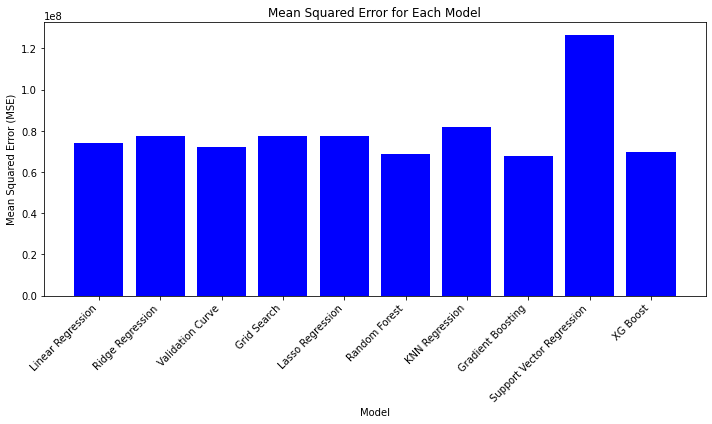

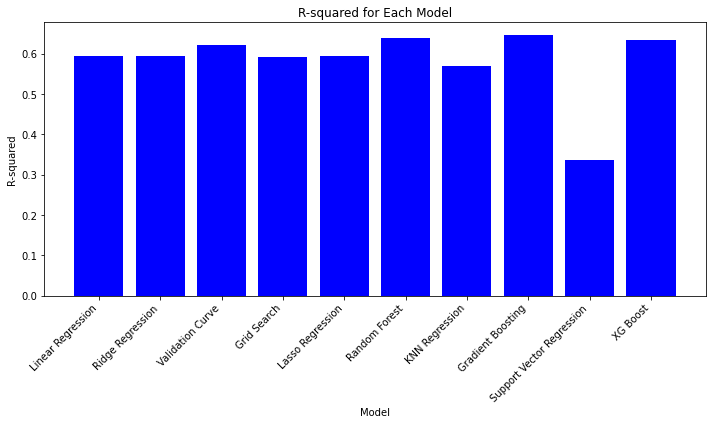

In [43]:
import matplotlib.pyplot as plt

# Define the names of the models
model_names = [
    "Linear Regression",
    "Ridge Regression",
    "Validation Curve",
    "Grid Search",
    "Lasso Regression",
    "Random Forest",
    "KNN Regression",
    "Gradient Boosting",
    "Support Vector Regression",
    "XG Boost"
]

# Define the Mean Squared Error (MSE) values for each model
mse_values = [
    73950131.21,
    77388795.36,
    72224103.90,
    77625506.47,
    77363437.10,
    68675719.00,
    81991899.15,
    67578210.06,
    126320923.61,
    69598077.47
]

# Define the R-squared values for each model
r_squared_values = [
    0.593,
    0.593,
    0.620,
    0.592,
    0.593,
    0.639,
    0.569,
    0.645,
    0.336,
    0.634
]

# Plotting Mean Squared Error (MSE) for each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='b')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for Each Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Plotting R-squared for each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, r_squared_values, color='blue')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared for Each Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### Model Selection
After a thorough comparison of the Mean Squared Error (MSE) and the coefficient of determination (R-squared) visualizations for each model, it became clear that Random Forest and Gradient Boosting outperformed the others in terms of accuracy. These two models consistently exhibited the highest R-squared scores and the lowest MSE values among all the models we evaluated. Ultimately, we opted for Random Forest as our preferred model because of its exceptional predictive accuracy, robustness, and user-friendly nature.

* High Accuracy: Random Forest is known for its accurate predictions.
* Resists Overfitting: It's less likely to overfit to your data.
* Handles Various Data: Works well with both categorical and numerical data.
* Easy to Use: Requires minimal configuration and is beginner-friendly.
* Feature Insights: Helps identify which features matter most.
* Ensemble Power: Combines multiple models for better performance.
* Parallel Processing: Speeds up training with parallel computing.
* Out-of-Bag Evaluation: Built-in cross-validation for model assessment.

### Selected Model

* Random Forest:
* Mean Squared Error: 68675719.00

* R-squared: 0.639

In [44]:
# Prepare New Employee For CTC Prediction
Employee = pd.DataFrame({
    'College':[1,1],
    'City':[1,0],
    'Previous CTC': [65000,55000],
    'Previous job change': [3, 0],
    'Graduation Marks': [90, 75],
    'EXP (Month)': [3, 1], 
    'Role_Manager':[0,1]
})

In [45]:
new_Employee_scaled = scaler.transform(Employee)

In [46]:
predictions = random_forest_model.predict(new_Employee_scaled)

In [47]:
for i, salary in enumerate(predictions):
    print(f"Predicted Salary for Employee {i + 1}: ${salary:.2f}")

Predicted Salary for Employee 1: $67921.64
Predicted Salary for Employee 2: $84063.91


<div style="border-radius: 10px; border: #0b0265 solid; background-color: #F0F8FF; font-size: 1.1em; letter-spacing: 0.5px; text-align: center;">
  <h1 style="color: #212529; font-weight: bold; font-family: Arial, sans-serif;">Questionnaires </h1>
</div>

### 1.Your views about the problem statement?

#### Views on the Problem Statement

The problem statement addresses a crucial aspect of HR analytics by aiming to predict the salaries of newly hired employees using a machine learning model. This is a practical and valuable application in the field of human resources, where determining fair and competitive compensation is essential for attracting and retaining talent. By leveraging historical data and various features related to employee background and qualifications, TechWorks Consulting can ensure that salary decisions are data-driven, consistent, and fair. This approach not only enhances operational efficiency but also contributes to higher employee satisfaction and retention. The clear and well-defined objective, along with the provided dataset, sets a strong foundation for developing a robust regression model to achieve these goals.

### 2. What will be your approach to solving this task?

#### Approach to Solving the Task

1. **Data Collection and Exploration:**
   - Load the dataset.
   - Explore the dataset to understand its structure, identify the features, and examine the target variable (CTC).

2. **Data Preprocessing:**
   - Handle missing values by either imputing or removing them.
   - Convert categorical variables into numerical representations:
     - College (Tier1, Tier2, Tier3) can be mapped to numerical values.
     - City (Metro, Non-Metro) can be encoded as binary (0 and 1).
     - Role (Manager, Executive) can be converted using one-hot encoding.
   - Identify and handle outliers to prevent skewed model predictions.
   - Normalize or standardize the numerical features to ensure all features are on a similar scale.

3. **Feature Engineering:**
   - Select relevant features that contribute to the target variable (CTC).
   - Create new features if necessary to improve model performance.

4. **Model Selection and Training:**
   - Split the dataset into training and testing sets.
   - Experiment with different regression models such as Linear Regression, Decision Tree Regression, Random Forest Regression, etc.
   - Train the models using the training set.

5. **Model Evaluation:**
   - Evaluate the models using metrics such as Mean Squared Error (MSE) and R-squared (R²) on the testing set.
   - Compare the performance of different models to select the best one.

6. **Model Tuning and Optimization:**
   - Fine-tune the hyperparameters of the selected model to improve its performance.
   - Use techniques such as cross-validation to ensure the model generalizes well to unseen data.

7. **Interpretation and Insights:**
   - Analyze the coefficients and feature importances to understand the impact of different features on the predicted salary.
   - Provide insights and recommendations based on the model's findings.

8. **Final Model Deployment:**
   - Save the final trained model for future predictions.
   


### 3. What were the available ML model options you had to perform this task?

The vailable models are: 
    
* Linear Regression

* Ridge Regression

* validation curve

* Grid Search

* Lasso Regression

* Random Forest

* KNN Regression

* Gradient Boosting

* Support Vector Regression

* XG Boost

### 4.Which model’s performance is best and what could be the possible reason for that?

Random Forest:

* Ensemble Averaging: Reduces errors and improves stability by combining multiple decision trees.
* Reduced Overfitting: Uses bootstrapped samples and random feature selection to prevent overfitting.
* Versatility: Handles various data types without extensive preprocessing.
* Feature Importance: Provides feature importance scores.
* Parallelization: Can be parallelized for efficient training.
* Out-of-Bag (OOB) Evaluation: Includes built-in cross-validation with OOB evaluation.
* Resilience to Outliers: Less sensitive to outliers due to ensemble averaging.

### 5. What steps can you take to improve this selected model’s performance even further?

To improve the performance of the selected regression model further, several steps can be taken:

#### 1. Feature Engineering and Selection:
- **Add Interaction Features:** Create new features that capture the interaction between existing features.
- **Polynomial Features:** Add polynomial features to capture non-linear relationships.
- **Feature Selection:** Use techniques like Recursive Feature Elimination (RFE) or feature importance from models like Random Forest to select the most influential features.

#### 2. Hyperparameter Tuning:
- **Grid Search:** Perform an exhaustive search over a specified parameter grid.
- **Random Search:** Perform a randomized search over parameters to cover a broader space in less time.
- **Bayesian Optimization:** Use methods like Bayesian optimization for more efficient hyperparameter tuning.

#### 3. Model Enhancement:
- **Ensemble Methods:** Combine multiple models (e.g., bagging, boosting) to reduce variance and improve prediction accuracy.
  - **Random Forest:** A combination of decision trees to improve robustness.
  - **Gradient Boosting Machines (GBM):** Boosting techniques like XGBoost or LightGBM for better performance.
- **Regularization:** Apply L1 (Lasso) or L2 (Ridge) regularization to prevent overfitting.

#### 4. Cross-Validation:
- **K-Fold Cross-Validation:** Use K-fold cross-validation to ensure that the model's performance is consistent across different subsets of the data.
- **Stratified K-Fold:** Ensure each fold has a similar distribution of the target variable to maintain the representativeness of the samples.

#### 5. Data Augmentation and Resampling:
- **Synthetic Data Generation:** Use techniques like SMOTE to generate synthetic samples for underrepresented classes.
- **Bootstrap Aggregation (Bagging):** Create multiple datasets through resampling and train models on each to reduce overfitting.

#### 6. Addressing Data Quality:
- **Handling Missing Values:** Ensure that missing values are handled appropriately, using imputation techniques or algorithms that can handle missing data.
- **Outlier Treatment:** Identify and handle outliers that could skew the model.

#### 7. Advanced Algorithms:
- **Deep Learning Models:** Explore neural networks for capturing complex patterns, especially if the dataset is large.
- **Support Vector Regression (SVR):** Consider using SVR for capturing non-linear relationships with a kernel trick.

#### 8. Incorporate Domain Knowledge:
- **Expert Input:** Use insights from domain experts to engineer features that may not be immediately obvious from the data alone.
- **External Data:** Incorporate relevant external data sources that might improve prediction accuracy, such as economic indicators or industry-specific trends.

#### 9. Model Interpretability and Monitoring:
- **SHAP Values:** Use SHAP (SHapley Additive exPlanations) values to interpret model predictions and ensure they make sense.
- **Regular Model Updates:** Continuously monitor model performance and retrain periodically with new data to maintain accuracy.





In [50]:
import joblib

# Assume 'model' is your trained model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(model, 'salary_prediction_model.pkl')

['salary_prediction_model.pkl']

In [51]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd

# Load the model from the file
model = joblib.load('salary_prediction_model.pkl')

# Title
st.title("Salary Prediction App")

# Input fields
college = st.selectbox("College", ["Tier1", "Tier2", "Tier3"])
city = st.selectbox("City", ["Metro", "Non-Metro"])
previous_ctc = st.number_input("Previous CTC")
previous_job_change = st.number_input("Previous Job Change")
graduation_marks = st.number_input("Graduation Marks")
exp_month = st.number_input("Experience (Months)")
role_manager = st.selectbox("Role", ["Manager", "Executive"])

# Encode categorical inputs
college_map = {"Tier1": 1, "Tier2": 2, "Tier3": 3}
city_map = {"Metro": 1, "Non-Metro": 0}
role_manager_map = {"Manager": 1, "Executive": 0}

college_encoded = college_map[college]
city_encoded = city_map[city]
role_manager_encoded = role_manager_map[role_manager]

# Create a dataframe for the inputs
input_data = pd.DataFrame({
    'College': [college_encoded],
    'City': [city_encoded],
    'Previous CTC': [previous_ctc],
    'Previous job change': [previous_job_change],
    'Graduation Marks': [graduation_marks],
    'EXP (Month)': [exp_month],
    'Role_Manager': [role_manager_encoded]
})

# Predict the CTC
if st.button("Predict CTC"):
    prediction = model.predict(input_data)
    st.write(f"Predicted CTC: {prediction[0]:.2f}")

# To run this app, save the script as app.py and use the command `streamlit run app.py` in your terminal.


2024-06-03 15:07:39.109 
  command:

    streamlit run C:\Users\91812\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run app.py
